Check that qiskit can been installed successfully

In [6]:
import qiskit
print("Qiskit version:",qiskit.__version__)

Qiskit version: 1.4.0


Example Circuit: Hello world

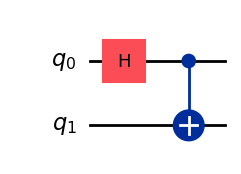

In [7]:
from qiskit import QuantumCircuit

# Create a simple circuit with 2 q-bits
qc = QuantumCircuit(2) 

# Add a Hadamard gate on qubit 0
qc.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
qc.cx(0, 1)

# Draw the circuit
qc.draw(output='mpl')

In [9]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
IX = Pauli('IX')
XI = Pauli('XI')

observables = [ZZ, ZI, IZ, XX, IX, XI]

In [13]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([ 1.        ,  0.05273438,  0.05273438,  1.        , -0.02734375,
       -0.02734375]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.002714447, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000468262, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 15921, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9972190856933594, 'simulator_metadata': [{'time_taken': 0.002714447, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00

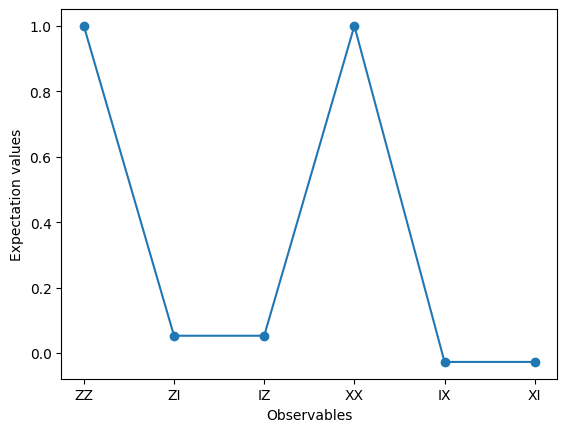

In [14]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'IX', 'XI']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.show()

Extend the example circuit to an $n$-qubit GHZ state

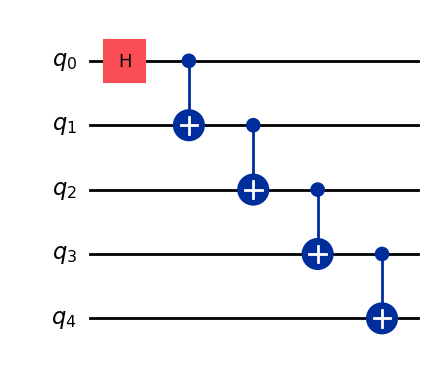

In [15]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 5
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

Expect the least noise from the qubits that are closer together 

In [17]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n - i - 2) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIII', 'ZIZII', 'ZIIZI', 'ZIIIZ']
4


Simple simulator example

In [9]:
import qiskit
from qiskit_aer.primitives import SamplerV2

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'111': 71, '000': 57}
